# Regression in Python

'''
Linear Regression Models
Prediction using linear regression
Some re-sampling methods
Train-Test splits
Cross Validation
'''

The packages we'll cover are: statsmodels, seaborn, and scikit-learn. While we don't explicitly teach statsmodels and seaborn

In [3]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


Populating the interactive namespace from numpy and matplotlib


# 2: Boston Housing Data Set

The Boston Housing data set contains information about the housing values in suburbs of Boston. This dataset was 
originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on
the UCI Machine Learning Repository.

This data set is available in the sklearn python module 

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
# boston

In [13]:
# column name
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [16]:
boston.data.shape

(506, 13)

In [18]:
# # Print description of Boston housing data set

print(boston.DESCR)
# boston.DESCR                 gives data in complex form display so print

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [19]:
df= pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



There are no column names in the DataFrame. Let's add those.

In [21]:
#df.columns = boston.feature_names               # shorter way
colname=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
df.columns=[colname]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called bos containing all the data we want to use to predict Boston Housing prices.
Let's create a variable called PRICE which will contain the prices. This information is contained in the target data.

In [22]:
print(boston.target.shape)

(506,)


In [23]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#  EDA and Summary Statistics

In [24]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Scatter plots

Let's look at some scatter plots for three variables: 'CRIM', 'RM' ,'B'and 'PTRATIO'.
What kind of relationship do you see? e.g. positive, negative? linear? non-linear?

Text(0.5,1,'Relationship between CRIM and Price')

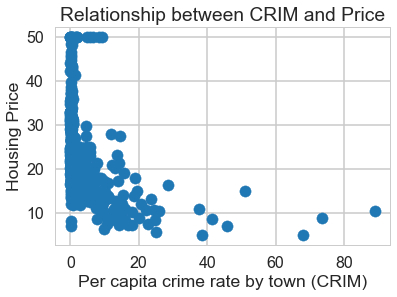

In [25]:

plt.scatter(df.CRIM, df.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5,1,'Relationship between RM and Price')

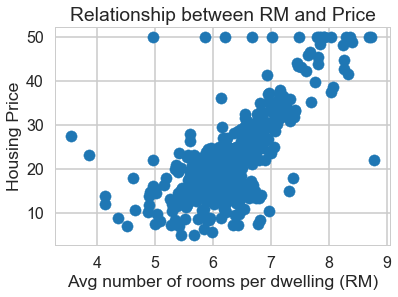

In [26]:
plt.scatter(df.RM, df.PRICE)
plt.xlabel("Avg number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5,1,'Relationship between RM and Price')

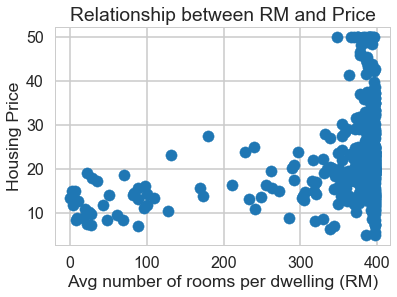

In [27]:
plt.scatter(df.B, df.PRICE)
plt.xlabel("Avg number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5,1,'Relationship between ZN and Price')

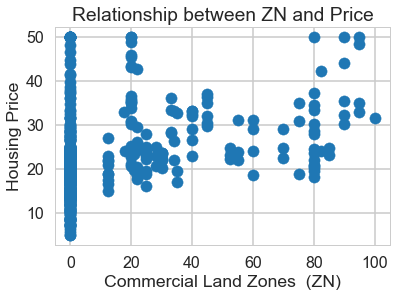

In [28]:
plt.scatter(df.ZN, df.PRICE)
plt.xlabel("Commercial Land Zones  (ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")

# Histograms

Histograms are a useful way to visually summarize the statistical properties of numeric variables. They can give you an idea of the mean and the spread of the variables as well as outliers.

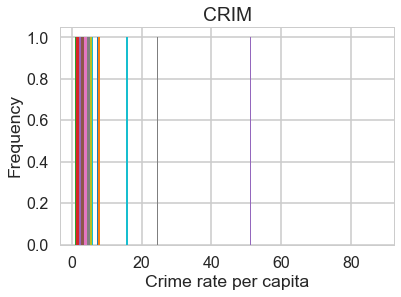

In [36]:
plt.hist(df.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

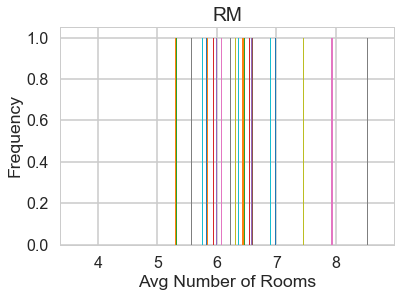

In [37]:
plt.hist(df.RM)
plt.title("RM")
plt.xlabel("Avg Number of Rooms")
plt.ylabel("Frequency")
plt.show()

# Linear regression with Boston housing data example

Here,

Y = boston housing prices (also called "target" data in python)

and

X = all the other features (or independent variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

Statsmodels is a great Python library for a lot of basic and inferential statistics. It also provides basic regression
functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in
the Data Science Intensive, it's a good library to have in your toolbox. Here's a quick example of what you could do with it.

In [39]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 16 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        01:21:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

# Fitting Linear Regression using sklearn

In [45]:
from sklearn.linear_model import LinearRegression     # import LR model
X = df._drop_axis('PRICE', axis = 1)

lm = LinearRegression()      # object create

C:\Users\Vitthal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  


Main functions	Description

lm.fit()	Fit a linear model

lm.predit()	Predict Y using the linear model with estimated coefficients

lm.score()	Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model,
as the proportion of total variation of outcomes explained by the model

# coeficient 
Output	Description         
lm.coef_	Estimated coefficients      
lm.intercept_	Estimated intercept

In [46]:
# fit the model
lm.fit(X, df.PRICE)     # y df.PRICE

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: [36.49110328]


In [55]:
# print('Number of coefficients:', len(lm.coef_))

In [52]:
# first five predicted prices
lm.predict(X)[0:5]

array([[30.00821269],
       [25.0298606 ],
       [30.5702317 ],
       [28.60814055],
       [27.94288232]])

# train_test_split

In [58]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, df.PRICE, test_size=0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339, 1)
(167, 1)


In [59]:
vit=LinearRegression()
vit.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
vit.predict(X_test)

array([[37.46723562],
       [31.39154701],
       [27.1201962 ],
       [ 6.46843347],
       [33.62966737],
       [ 5.67067989],
       [27.03946671],
       [29.92704748],
       [26.35661334],
       [22.45246021],
       [32.20504441],
       [21.78641653],
       [23.41138441],
       [33.60894362],
       [28.28619511],
       [15.13859055],
       [ 0.30087325],
       [18.71850376],
       [14.4706712 ],
       [11.10823598],
       [ 2.69494197],
       [19.21693734],
       [38.41159345],
       [24.36936442],
       [31.61493439],
       [11.42210397],
       [24.92862188],
       [23.31178043],
       [22.7764079 ],
       [20.65081211],
       [16.035198  ],
       [ 7.07978633],
       [17.65509209],
       [22.81470561],
       [29.21943405],
       [18.61354566],
       [28.37701843],
       [ 8.80516873],
       [41.65140459],
       [34.02910176],
       [20.1868926 ],
       [ 3.95600857],
       [29.69124564],
       [12.18081256],
       [27.19403498],
       [30

In [62]:
# mean square error
mse3 = np.mean((Y_test - vit.predict(X_test)) ** 2)
print(mse3)

PRICE    28.541367
dtype: float64


In [63]:
mse4 = np.mean((Y_train - vit.predict(X_train)) ** 2)
print(mse4)

PRICE    19.546758
dtype: float64


The results are different, but what this means is that the model may be overfitting as the MSE for the training set is 
smaller than the MSE for the test set.

# residual plot

Text(0,0.5,'Residuals')

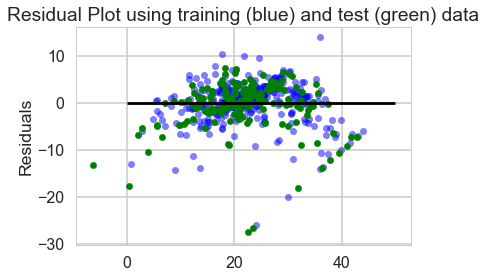

In [66]:
plt.scatter(vit.predict(X_train), vit.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(vit.predict(X_test), vit.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

Do you think this linear regression model generalizes well on the test data?

There appears to be a slight non-linear curve in the residual plot, meaning that we should likely look to a higher dimensional 
algorithm to predict the housing prices

In [67]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
bos_target_int = boston.target.astype(int)
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, boston.data, bos_target_int, cv=4)

C:\Users\Vitthal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Implement K-Fold cross-validation using the procedure above and Boston Housing data set using K=4. How does the average 
prediction error compare to the train-test split above

In [68]:
scores

array([0.13103448, 0.10687023, 0.18333333, 0.10909091])

In [70]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.13 (+/- 0.06)


The average prediction error is much better in with cross-fold validation, at 0.13 vs 0.19 or greater in our test/train examples above.